In [1]:
import sys
sys.path.append('..')
import awkward as awk
from heputl import logging as heplog

In [2]:
import src.reader as read
import src.selection as sele
import src.string_constants as stco
import src.util as util

In [3]:
dsids = sum(list(stco.ds_ids_sig.values()),[])[:4]

In [16]:
feature_filter=['jet_pt_lead','jet_eta_lead','jet_truthflav_lead']

In [17]:
N=int(1e5)
samples_concat = None
weights_concat = None

In [18]:
for dsid in dsids:
    samples = read.read_samples_for_dsid(dsid,N=N)
    selected = sele.select_lightjets(samples)
    weights = util.compute_w_samples(selected, dsid)
    if weights_concat is None:
        weights_concat = weights
        samples_concat = selected[feature_filter]
    else:    
        weights_concat = awk.concatenate([weights_concat,weights])
        samples_concat = awk.concatenate([samples_concat,selected[feature_filter]])

reading samples for dsid 506193 from /eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.506193.MGPy8EG_Zee_FxFx_3jets_HT2bias_BF.D_FTAG2.e8382_s3681_r13144_p5981.GN2v01_Nom_output.root
reading samples for dsid 506194 from /eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.506194.MGPy8EG_Zee_FxFx_3jets_HT2bias_CFBV.D_FTAG2.e8382_s3681_r13144_p5981.GN2v01_Nom_output.root
reading samples for dsid 506195 from /eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.506195.MGPy8EG_Zee_FxFx_3jets_HT2bias_CVBV.D_FTAG2.e8382_s3681_r13144_p5981.GN2v01_Nom_output.root
reading samples for dsid 506196 from /eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.506196.MGPy8EG_Zmumu_FxFx_3jets_HT2bias_BF.D_FTAG2.e8382_s3681_r13144_p5981.GN2v01_Nom_output.root


In [19]:
samples_concat.fields

['jet_pt_lead', 'jet_eta_lead', 'jet_truthflav_lead']

In [21]:
samples_concat['wt'] = weights_concat

In [22]:
jetU, jetC, jetB, jetT = util.split_by_jet_flavor(samples_concat)

In [23]:
jetU

<Array [{jet_pt_lead: 1.64e+05, ...}, ...] type='145316 * {jet_pt_lead: flo...'>

In [20]:
import matplotlib.pyplot as plt

In [12]:
# Load dataset
dsid_ee = stco.ds_ids_sig['ee'][0]
samples_ee = read.read_samples_for_dsid(dsid_ee,N=N)

# Apply event selection
selected_ee = sele.select_lightjets(samples_ee)

# Get MC lumi normalization weights
weights_ee = util.compute_w_samples(selected_ee, dsid_ee)

reading samples for dsid 506193 from /eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.506193.MGPy8EG_Zee_FxFx_3jets_HT2bias_BF.D_FTAG2.e8382_s3681_r13144_p5981.GN2v01_Nom_output.root


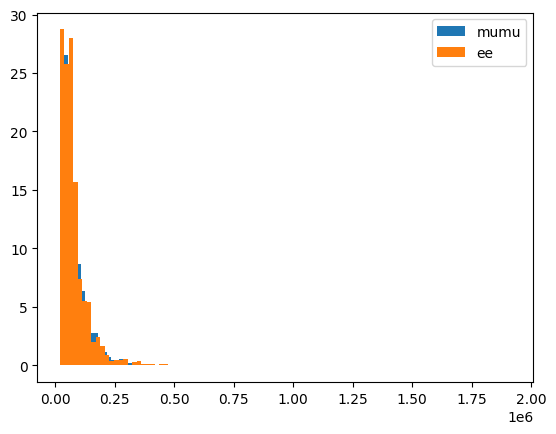

In [23]:
fig, ax = plt.subplots()
_ = ax.hist(selected.jet_pt_lead, weights=weights, stacked=True, label='mumu',bins=100)
_ = ax.hist(selected_ee.jet_pt_lead, weights=weights_ee, stacked=True, label='ee',bins=100)
plt.legend()
plt.show()

In [ ]:
samples = 

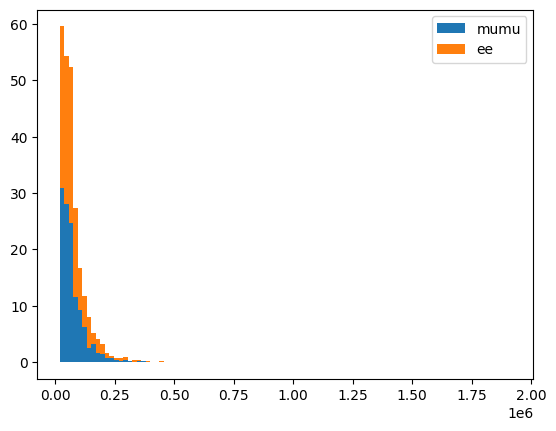

In [22]:
plt.figure()
_ = plt.hist([selected.jet_pt_lead,selected_ee.jet_pt_lead], weights=[weights,weights_ee], stacked=True, label=['mumu','ee'], bins=100)
plt.legend()
plt.show()